<a href="https://colab.research.google.com/github/matheusfsm/datascience_steps/blob/master/Acidentes_Tr%C3%A2nsito_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Colaboratory logo" width="40%" src="https://raw.githubusercontent.com/matheusfsm/datascience_steps/master/datahivelogo5.jpg">

---

# Análise dos Dados de acidentes de trânsito no estado de São Paulo.

Os dados do [Infosiga SP](https://bit.ly/3cOIPL7) mostram que o Estado de São Paulo registrou cerca de **143 mil** acidentes de trânsito em 2019.

Tendo como objetivo reduzir os acidentes, através de articulações com outras pastas da administração estadual, foi criado o  [Programa Respeito à Vida](http://www.respeitoavida.sp.gov.br/), que fornece dados em seu portal.

Neste *notebook* iremos analisar dados de acidentes que resultaram em óbitos, e ver quais insights podem ser extraídos dos dados brutos.


## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# instalando pandasprofiling

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

## Análise dos Dados


In [0]:
#importando arquivo para um dataframe
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/acidentes_sp_clean.csv')

In [0]:
#mostrando 5 primeiras entradas
df.head()

,Id da Delegacia (RDO),Número do Bo (RDO),Ano do BO (RDO),Data do Óbito,Data do Acidente,Tipo de via,Dia do óbito,Mês do Óbito,Mês Óbito Descrição,Ano do Óbito,Ano/Mês do Óbito,Dia da Semana,Hora do Acidente,Turno,Município,Região Administrativa,Logradouro,Númeral / KM,Jurisdição,Administração,Conservação,Tipo do local da ocorrência,LAT_(GEO),LONG_(GEO),Tipo do veículo da vítima,Tipo de vítima,Local do óbito,Tipo de acidente,Sub Tipo do Acidente,Tempo entre o Acidente e o óbito,Sexo,Faixa etária,Idade da vítima,Outro Veículo Envolvido
0,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,2020.04,QUINTA,17:30:00,TARDE,ARACARIGUAMA,Sorocaba,SP 280,"50,0",ESTADUAL,CONCESSIONÁRIA,VIAOESTE,PUBLICO,-23.439186,-47.065945,ONIBUS,CONDUTOR,VIA,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,45-49,48.0,ONIBUS
1,120514,889,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,2020.04,QUINTA,17:30:00,TARDE,ARACARIGUAMA,Sorocaba,SP 280,"50,0",ESTADUAL,CONCESSIONÁRIA,VIAOESTE,PUBLICO,-23.439186,-47.065945,ONIBUS,PASSAGEIRO,ESTABELECIMENTO DE SAUDE,CHOQUE,VEÍCULO ESTACIONADO,Mesmo dia,MASCULINO,35-39,36.0,ONIBUS
2,110429,3887,2020,2020-04-30,2020-04-17,Rodovias,30,4,ABRIL,2020,2020.04,SEXTA,3:50:00,MADRUGADA,SAO JOSE DO RIO PRETO,São José do Rio Preto,BR 153,"57,5",FEDERAL,CONCESSIONÁRIA,TRANSBRASILIANA,PUBLICO,-20.772532,-49.350863,MOTOCICLETA,CONDUTOR,ESTABELECIMENTO DE SAUDE,CHOQUE,DEFENSA / BARREIRA,Até 30 dias,MASCULINO,25-29,26.0,NÃO HÁ
3,30309,1745,2020,2020-04-30,2020-04-30,Rodovias,30,4,ABRIL,2020,2020.04,QUINTA,18:30:00,NOITE,SUZANO,Metropolitana de São Paulo,SP 021,"110,0",ESTADUAL,CONCESSIONÁRIA,SPMAR,PUBLICO,-23.566580,-46.342199,PEDESTRE,PEDESTRE,VIA,ATROPELAMENTO,CRUZANDO A VIA,Mesmo dia,MASCULINO,NAO DISPONIVEL,NaN,AUTOMOVEL
4,70923,1373,2020,2020-04-30,2020-04-30,Vias Municipais,30,4,ABRIL,2020,2020.04,QUINTA,17:50:00,TARDE,LIMEIRA,Campinas,RUA ITAPEMA,"481,0",MUNICIPAL,PREFEITURA,PREFEITURA,PUBLICO,-22.552483,-47.405759,BICICLETA,CONDUTOR,VIA,CHOQUE,MURO/PAREDE/TALUDE,Mesmo dia,FEMININO,30-34,30.0,NÃO HÁ


In [0]:
#tamanho do nosso dataframe
df.shape

(30571, 34)

In [0]:
# captando e atribuindo novos nomes de somente colunas importantes para analise

columns = {
  'Data do Acidente' : 'data_acidente', 
  'Tipo de via' : 'tipo_via',
  'Hora do Acidente' : 'hora_acidente',
  'Município' : 'municipio',
  'Logradouro' : 'logradouro',
  'LAT_(GEO)' : 'lat',
  'LONG_(GEO)' : 'lon',
  'Tipo do veículo da vítima': 'tipo_veículo',
  'Tipo de vítima' : 'tipo_vítima',
  'Tipo de acidente' : 'tipo_acidente',
  'Tempo entre o Acidente e o óbito' : 'tempo_acidente_obito',
  'Sexo' : 'sexo',
  'Idade da vítima' : 'idade',
  'Outro Veículo Envolvido' : 'outro_veiculo_envolvido',
  'Faixa etária' : 'faixa_etaria'
}
df = df.rename(columns, axis=1)

In [0]:
# substituindo o dataframe por colunas renomeadas

df = df[list(columns.values())]

In [0]:
#mostrando 5 primeiras entradas dataframe atualizado
df.head()

,data_acidente,tipo_via,hora_acidente,municipio,logradouro,lat,lon,tipo_veículo,tipo_vítima,tipo_acidente,tempo_acidente_obito,sexo,idade,outro_veiculo_envolvido,faixa_etaria
0,2020-04-30,Rodovias,17:30:00,ARACARIGUAMA,SP 280,-23.439186,-47.065945,ONIBUS,CONDUTOR,CHOQUE,Mesmo dia,MASCULINO,48.0,ONIBUS,45-49
1,2020-04-30,Rodovias,17:30:00,ARACARIGUAMA,SP 280,-23.439186,-47.065945,ONIBUS,PASSAGEIRO,CHOQUE,Mesmo dia,MASCULINO,36.0,ONIBUS,35-39
2,2020-04-17,Rodovias,3:50:00,SAO JOSE DO RIO PRETO,BR 153,-20.772532,-49.350863,MOTOCICLETA,CONDUTOR,CHOQUE,Até 30 dias,MASCULINO,26.0,NÃO HÁ,25-29
3,2020-04-30,Rodovias,18:30:00,SUZANO,SP 021,-23.566580,-46.342199,PEDESTRE,PEDESTRE,ATROPELAMENTO,Mesmo dia,MASCULINO,NaN,AUTOMOVEL,NAO DISPONIVEL
4,2020-04-30,Vias Municipais,17:50:00,LIMEIRA,RUA ITAPEMA,-22.552483,-47.405759,BICICLETA,CONDUTOR,CHOQUE,Mesmo dia,FEMININO,30.0,NÃO HÁ,30-34


## Visualização gráfica de informaçãoes relevantes

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

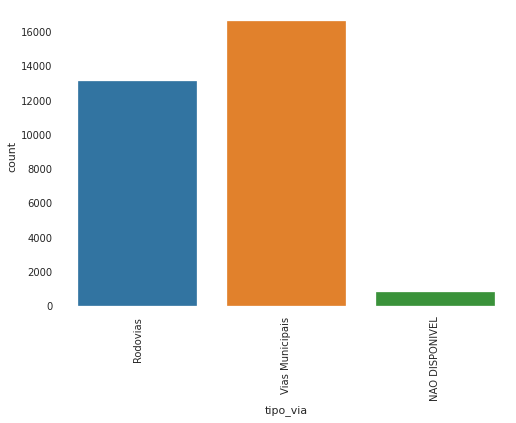

In [0]:
sns.countplot(df.tipo_via)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

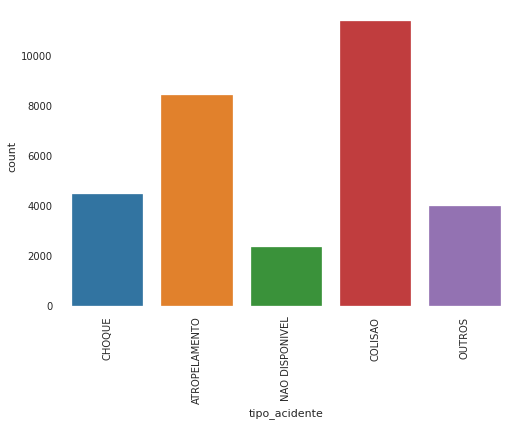

In [0]:
sns.countplot(df.tipo_acidente)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

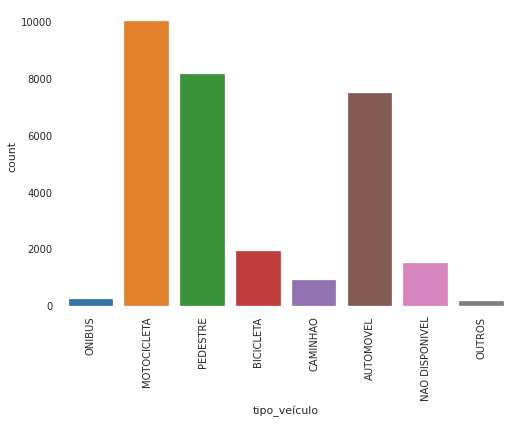

In [0]:
sns.countplot(df.tipo_veículo)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

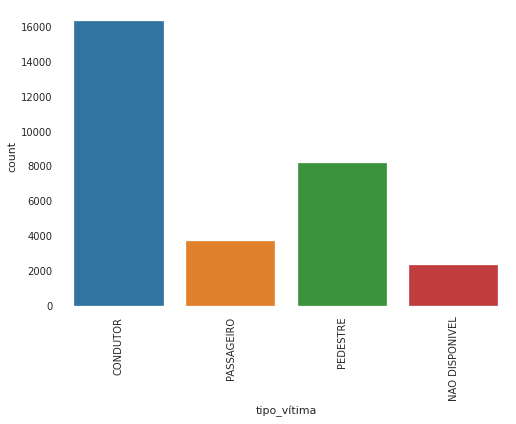

In [0]:
sns.countplot(df.tipo_vítima)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

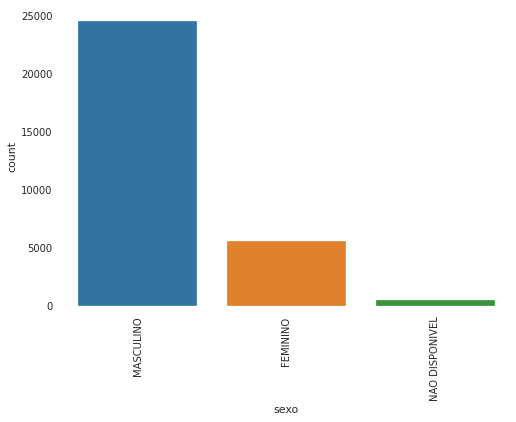

In [0]:
sns.countplot(df.sexo)
plt.xticks(rotation=90)

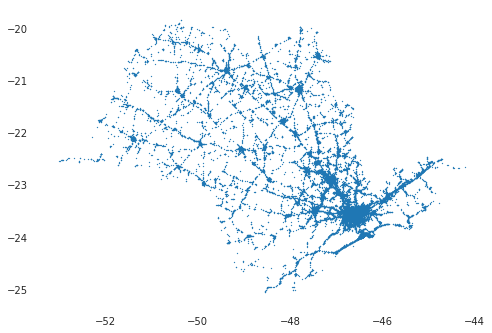

In [0]:
plt.scatter(df.lon, df.lat, s=1)

## Conclusões

Apesar da análise ter sido superficial, podemos observar e comprovar o que talvez a intuição já nos dizia, a maioria dos acidentes acontecem em vias municipais, por colisões, onde os veículos que mais se envolvem em acidentes fatais são as motocicletas, os dados também mostram que homens são a maioria dos casos.

O gráfico de dispersão concentrou a maioria dos acidentes na capital do estado.

Outras observações a serem feitas nessa análise, é que o número de mortes por atropelamento também é elevado, sendo o segundo maior causador de mortes.

Uma informação complementar que pode ser encontrada no portal de notícias [Cidade de São Paulo](http://www.capital.sp.gov.br/noticia/acidentes-de-transito-custam-r-6-milhoes-a-saude), levantou que no ano de 2018, cerca de R$ 14,4 milhões de reais destinados a saúde foram utilizados com acidentes de trânsito, causando um grande impacto, vale pensar que todo acidente pode ser prevenido ou evitado.

